In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import glob
import random
import math
import numpy as np
import dlib
import tensorflow as tf
import itertools
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
!unzip '/content/drive/MyDrive/images.zip'  

Streaming output truncated to the last 5000 lines.
 extracting: sad/30740.jpg           
 extracting: sad/30743.jpg           
 extracting: sad/30750.jpg           
 extracting: sad/30752.jpg           
 extracting: sad/30757.jpg           
 extracting: sad/30764.jpg           
 extracting: sad/30767.jpg           
 extracting: sad/30776.jpg           
 extracting: sad/3078.jpg            
 extracting: sad/30784.jpg           
 extracting: sad/30785.jpg           
 extracting: sad/30791.jpg           
 extracting: sad/30800.jpg           
 extracting: sad/30810.jpg           
 extracting: sad/30816.jpg           
 extracting: sad/3082.jpg            
 extracting: sad/30833.jpg           
 extracting: sad/30838.jpg           
 extracting: sad/30839.jpg           
 extracting: sad/30846.jpg           
 extracting: sad/30863.jpg           
 extracting: sad/30879.jpg           
 extracting: sad/30880.jpg           
 extracting: sad/30892.jpg           
 extracting: sad/30898.jpg           

In [ ]:
detector = dlib.get_frontal_face_detector()
data = {} #Make dictionary for all values
predictor = dlib.shape_predictor("/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat") #Or set this to whatever you named the downloaded file

In [ ]:
def get_landmarks(image):
    detections = detector(image, 1)
    for k,d in enumerate(detections): #For all detected face instances individually
        shape = predictor(image, d) #Draw Facial Landmarks with the predictor class
        xlist = []
        ylist = []
        for i in range(1,68): #Store X and Y coordinates in two lists
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))
        xmean = np.mean(xlist)
        ymean = np.mean(ylist)
        xcentral = [(x-xmean) for x in xlist]
        ycentral = [(y-ymean) for y in ylist]
        landmarks_vectorised = []
        for x, y, w, z in zip(xcentral, ycentral, xlist, ylist):
            landmarks_vectorised.append(w)
            landmarks_vectorised.append(z)
            meannp = np.asarray((ymean,xmean))
            coornp = np.asarray((z,w))
            dist = np.linalg.norm(coornp-meannp)
            landmarks_vectorised.append(dist)
            landmarks_vectorised.append((math.atan2(y, x)*360)/(2*math.pi))
        data['landmarks_vectorised'] = landmarks_vectorised
    if len(detections) < 1:
        data['landmarks_vestorised'] = "error"

In [ ]:
def make_sets():
    training_data = []
    training_labels = []
    emotions = ['happy', 'sad', 'angry', 'surprise', 'neutral']
    #emotions = ['happy', 'surprise', 'angry']
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    for emotion in emotions:
      for filename in os.listdir(emotion):
          print(" working on %s" %emotion)
          #Append data to training and prediction list, and generate labels 0-7
          image = cv2.imread(emotion+'/'+filename) 
          #image = cv2.imread(item) #open image
          gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
          clahe_image = clahe.apply(gray)
          get_landmarks(clahe_image)
          if data['landmarks_vectorised'] == "error":
              print("no face detected on this one")
          else:
              training_data.append(data['landmarks_vectorised']) #append image array to training data list
              training_labels.append(emotion)
    return training_data, training_labels

In [ ]:
#making the dataset
Train_X, Train_y = make_sets()

Streaming output truncated to the last 5000 lines.
 working on surprise
 working on surprise
 working on surprise
 working on surprise
 working on surprise
 working on surprise
 working on surprise
 working on surprise
 working on surprise
 working on surprise
 working on surprise
 working on surprise
 working on surprise
 working on surprise
 working on surprise
 working on surprise
 working on surprise
 working on surprise
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on neutral
 working on

In [ ]:
#shuffling the data
from sklearn.utils import shuffle
image_arr, label_arr = shuffle(np.array(Train_X), np.array(Train_y))

In [ ]:
## implementing K-fold cross validation
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
kfold = KFold(5, True, 1)
# enumerate splits
i = 1
Xtrain_dict = {}
Xtest_dict = {}
ytrain_dict = {}
ytest_dict = {}
for train, test in kfold.split(image_arr):
  
  print('train: %s, test: %s' % (train, test))
  scaler = StandardScaler() 
  Xtrain, ytrain = image_arr[train], label_arr[train]
  Xtest, ytest = image_arr[test], label_arr[test]
  Xtrain = scaler.fit_transform(Xtrain)
  Xtest = scaler.fit_transform(Xtest)
  Xtrain_dict['Group' + str(i)] = Xtrain
  Xtest_dict['Group' + str(i)] = Xtest
  ytrain_dict['Group' + str(i)] = ytrain
  ytest_dict['Group' + str(i)] = ytest
  i += 1



##making train and test sets with k-groups

#train_size = int(0.8 * len(image_arr))
#train_x_orig = image_arr[:train_size] 
#train_y_orig = label_arr[:train_size]
#test_x_orig = image_arr[train_size:]
#test_y_orig = label_arr[train_size:]
#print(train_x_orig.shape)
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler = StandardScaler() 
#train_x_orig = scaler.fit_transform(train_x_orig)
#test_x_orig = scaler.fit_transform(test_x_orig)
#print(train_x_orig)

train: [    1     3     5 ... 24279 24280 24281], test: [    0     2     4 ... 24260 24268 24278]
train: [    0     1     2 ... 24279 24280 24281], test: [    5     6    12 ... 24273 24275 24276]
train: [    0     1     2 ... 24278 24280 24281], test: [    3     8    17 ... 24254 24277 24279]
train: [    0     2     3 ... 24278 24279 24280], test: [    1     9    10 ... 24269 24274 24281]
train: [    0     1     2 ... 24278 24279 24281], test: [   14    15    18 ... 24264 24272 24280]


In [ ]:
## one hot encoding of the train and test labels 
## caution: use only when dataset made without k-groups

#train_y = train_y.reshape(train_y.shape[0], -1).T  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(train_y_orig)
#print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
train_y = onehot_encoder.fit_transform(integer_encoded)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(test_y_orig)
#print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
test_y = onehot_encoder.fit_transform(integer_encoded)
print(train_y)
print(train_y.shape)

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
(19425, 5)


In [ ]:
##NN class
class NeuralNetwork(object):
    def __init__(self):
        #parameters
        self.m_dw1, self.v_dw1 = 0,0
        self.m_dw2, self.v_dw2 = 0,0
        self.m_db1, self.v_db1 = 0,0
        self.m_db2, self.v_db2 = 0,0
        self.t = 0
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.epsilon = 1e-8
        self.eta = 0.01
        self.inputSize = 268
        self.outputSize = 5
        self.hiddenSize1 = 80      #previously 3
        self.learning_rate = 0.9
        self.lambd = 0                   #regularization parameter
        self.costs = []
        self.train_accuracy_list = []
        self.test_accuracy_list = []
        self.train_cost_lst = []
        self.test_cost_lst = []
        
        #weights
        self.W1 = np.random.rand(self.inputSize, self.hiddenSize1) * np.sqrt(2./self.inputSize) # (3x2) weight matrix from input to hidden layer (Kaiming initialization)
        self.B1 = np.random.randn(self.hiddenSize1)
        self.W2 = np.random.rand(self.hiddenSize1, self.outputSize) * np.sqrt(2./self.hiddenSize1)# (3x1) weight matrix from hidden to output layer
        self.B2 = np.random.randn(self.outputSize)


    def sigmoid(self, s):
        a = 1/(1 + np.exp(-s))
        return a


    def sigmoid_derivative(self, s):
      return self.sigmoid(s) * (1-self.sigmoid(s))

    def softmax(self, s):
      expZ = np.exp(s)
      y = expZ / expZ.sum(axis=1, keepdims=True)
      return y
      
    def ReLu(self, s, deriv=False):
      if (deriv == True):
        dZ = np.zeros(s.shape)
        for i in range(dZ.shape[0]):
          for j in range(dZ.shape[1]):
            if(s[i,j] > 0):
              dZ[i,j] = 1
        return dZ
      return np.maximum(0,s)

    def softmax_crossentropy_loss(self, predicted_labels, actual_labels):
      return np.sum(-actual_labels * np.log(predicted_labels))

    
    def getAccuracy(self, predicted_labels, actual_labels):
      correct_pred = 0
      inv_pred = onehot_encoder.inverse_transform(predicted_labels)
      inv_pred = label_encoder.inverse_transform(inv_pred.astype(int).ravel())
      inv_actual = onehot_encoder.inverse_transform(actual_labels)
      inv_actual = label_encoder.inverse_transform(inv_actual.astype(int).ravel())     
      for i in range(len(inv_actual)):
        if inv_actual[i] == inv_pred[i]:
          correct_pred +=1
      accuracy = correct_pred/actual_labels.shape[0]
      return accuracy



    def evaluate(self):
     iterations = np.round(np.linspace(0,5000,5000))   
     plt.plot(iterations, self.train_accuracy_list, 'r', label = 'Train') # plotting t, a separately 
     plt.plot(iterations, self.test_accuracy_list, 'b', label = 'Test') # plotting t, b separately 
     plt.legend("Train", "Test")
     plt.xlabel("Epochs")
     plt.ylabel("Accuracy")
     plt.title("Accuracy vs Epochs")
     plt.show()
     #self.train_accuracy_list = []
     #self.test_accuracy_list = []

    def loss(self):
     iterations = np.round(np.linspace(0,5000,5000))    
     plt.plot(iterations, self.train_cost_lst, 'r', label = 'Train') # plotting t, a separately 
     plt.plot(iterations, self.test_cost_lst, 'b', label = 'Test') # plotting t, b separately 
     plt.legend("Train", "Test")
     plt.xlabel("Epochs")
     plt.ylabel("Loss")
     plt.title("Loss vs Epochs")
     plt.show()



    def feedForward(self, X):
        #forward propogation through the network
        self.z1 = np.dot(X, self.W1) + self.B1#dot product of X (input) and first set of weights (3x2)
        self.a1 = self.sigmoid(self.z1) #activation function
        self.z2 = np.dot(self.a1, self.W2) + self.B2
        output = self.softmax(self.z2)
        return output

    def test_feedForward(self,X):
        #forward propogation through the network
        x1 = np.dot(X, self.W1) + self.B1#dot product of X (input) and first set of weights (3x2)
        y1 = self.sigmoid(x1) #activation function
        zt1 = np.dot(y1, self.W2) + self.B2
        output = self.softmax(zt1)
        return output

    def backward(self, X, y, output):
        #backward propogate through the network
        self.output_delta = (output-y)
        
        self.a1_error = self.output_delta.dot(self.W2.T) #z2 error: how much our hidden layer weights contribute to output error
        self.a1_delta = self.a1_error * self.sigmoid_derivative(self.z1) #applying derivative of sigmoid to z2 error   #dW1
        
        self.dW1 = X.T.dot(self.a1_delta)
        self.dW2 = self.a1.T.dot(self.output_delta)
        self.dB1 = (self.a1_error*self.sigmoid_derivative(self.z1)).sum(axis=0)
        self.dB2 = self.output_delta.sum(axis=0)
        
        #fist-order moment estimate of the mean (moving average for W) (gradient descent with momentum)
        self.m_dw1 = self.beta1*self.m_dw1 + (1-self.beta1)*self.dW1
        self.m_dw2 = self.beta1*self.m_dw2 + (1-self.beta1)*self.dW2
        self.m_db1 = self.beta1*self.m_db1 + (1-self.beta1)*self.dB1
        self.m_db2 = self.beta1*self.m_db2 + (1-self.beta1)*self.dB2
        
        #second-order moment estimate of the variance (moving average for W**2) (RMSprop)
        self.v_dw1 = self.beta2*self.v_dw1 + (1-self.beta2)*(self.dW1** 2)
        self.v_dw2 = self.beta2*self.v_dw2 + (1-self.beta2)*(self.dW2** 2)
        self.v_db1 = self.beta2*self.v_db1 + (1-self.beta2)*self.dB1
        self.v_db2 = self.beta2*self.v_db2 + (1-self.beta2)*self.dB2

        #bias correction
        self.m_dw1_corr = self.m_dw1/(1-self.beta1 ** self.t)
        self.m_dw2_corr = self.m_dw2/(1-self.beta1 ** self.t)
        self.m_db1_corr = self.m_db1/(1-self.beta1 ** self.t)       
        self.m_db2_corr = self.m_db2/(1-self.beta1 ** self.t)
        self.v_dw1_corr = self.v_dw1/(1-self.beta2 ** self.t)
        self.v_dw2_corr = self.v_dw2/(1-self.beta2 ** self.t)
        self.v_db1_corr = self.v_db1/(1-self.beta2 ** self.t)
        self.v_db2_corr = self.v_db2/(1-self.beta2 ** self.t)


        self.W1 -= self.eta*(self.m_dw1_corr/(np.sqrt(np.abs(self.v_dw1_corr))+self.epsilon)) + (self.lambd * self.W1)/X.shape[0]
        self.B1 -= self.eta*(self.m_db1_corr/(np.sqrt(np.abs(self.v_db1_corr))+self.epsilon))

        
        self.W2 -= self.eta*(self.m_dw2_corr/(np.sqrt(np.abs(self.v_dw2_corr))+self.epsilon)) + (self.lambd * self.W2)/X.shape[0]
        self.B2 -= self.eta*(self.m_db2_corr/(np.sqrt(np.abs(self.v_db2_corr))+self.epsilon))       
        
        
    def train(self, X, y, test_X, test_y, epochs):
        for i in range(epochs):
          train_output = self.feedForward(X)
          test_output = self.test_feedForward(test_X)
          train_acc = self.getAccuracy(train_output, y)
          test_acc = self.getAccuracy(test_output, test_y)
          self.train_accuracy_list.append(train_acc)
          self.test_accuracy_list.append(test_acc)
          train_cost = self.softmax_crossentropy_loss(train_output, y)
          test_cost = self.softmax_crossentropy_loss(test_output, test_y)
          self.train_cost_lst.append(train_cost)
          self.test_cost_lst.append(test_cost)
          if (i%100 == 0):
              print("Iteration number: ", i, "cost: ", train_cost)
              self.costs.append(train_cost)
          self.t = i+1
          if (self.t == 1001):
            self.t = 1

          self.backward(X, y, train_output)

    def returnModel(self):
      dictionary = {}
      dictionary["W1"] = self.W1
      dictionary["W2"] = self.W2
      dictionary["B1"] = self.B1
      dictionary["B2"] = self.B2
      return dictionary

    def predict(self, X):
        #forward propogation through the network
        self.z1 = np.dot(X, self.W1) + self.B1#dot product of X (input) and first set of weights (3x2)
        self.a1 = self.sigmoid(self.z1) #activation function
        self.z2 = np.dot(self.a1, self.W2) + self.B2
        output = self.softmax(self.z2)
        return output

In [ ]:
#run this cell when k-fold cross validation implemented
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
model = {}
NN = NeuralNetwork()
for i in range(5):
  print("Training for Group" + str(i+1))
  xtrain, ytrain= Xtrain_dict['Group' + str(i+1)], ytrain_dict['Group' + str(i+1)] 
  xtest, ytest = Xtest_dict['Group' + str(i+1)], ytest_dict['Group' + str(i+1)] 
  # integer encode
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(ytrain)
  #print(integer_encoded)
  # binary encode
  onehot_encoder = OneHotEncoder(sparse=False)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  ytrain = onehot_encoder.fit_transform(integer_encoded)
  # integer encode
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(ytest)
  #print(integer_encoded)
  # binary encode
  onehot_encoder = OneHotEncoder(sparse=False)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  ytest = onehot_encoder.fit_transform(integer_encoded)

  NN.train(xtrain, ytrain, xtest, ytest, 1000)
  #NN.evaluate()
  #NN.loss()
  model["Group" + str(i+1)] = NN.returnModel()




Training for Group1
Iteration number:  0 cost:  34730.23494301718
Iteration number:  100 cost:  18333.498132172335
Iteration number:  200 cost:  14498.0757390393
Iteration number:  300 cost:  11494.487507560403
Iteration number:  400 cost:  9455.898944347604
Iteration number:  500 cost:  7979.180034107974
Iteration number:  600 cost:  6901.935944469545
Iteration number:  700 cost:  5949.284149758887
Iteration number:  800 cost:  5228.058078822032
Iteration number:  900 cost:  4537.679080980113
Training for Group2
Iteration number:  0 cost:  8213.263132559958
Iteration number:  100 cost:  6756.609031172224
Iteration number:  200 cost:  5960.4276167004655
Iteration number:  300 cost:  5304.494788179884
Iteration number:  400 cost:  4717.538568170439
Iteration number:  500 cost:  4288.599383601491
Iteration number:  600 cost:  3948.4863614425403
Iteration number:  700 cost:  3617.4833528098798
Iteration number:  800 cost:  3290.6433256897085
Iteration number:  900 cost:  3550.709466762016

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http://matp

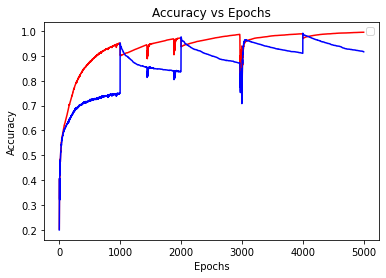

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http://matp

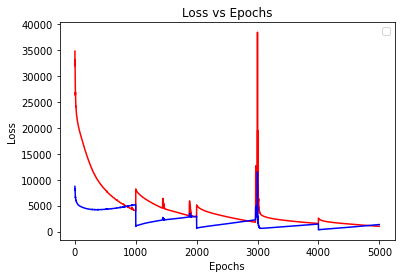

In [ ]:
NN.evaluate()
NN.loss()
parameters = model["Group5"]

In [ ]:
# run this cell when k-fold cross validation not implemented
NN = NeuralNetwork()
NN.train(train_x_orig, train_y, test_x_orig, test_y, 1000)

Iteration number:  0 cost:  20851.156684569974
Iteration number:  100 cost:  5125.763470383421
Iteration number:  200 cost:  3650.544275344022
Iteration number:  300 cost:  2406.3883111432224
Iteration number:  400 cost:  1552.393363683618
Iteration number:  500 cost:  1001.3279960859427
Iteration number:  600 cost:  666.3628157838318
Iteration number:  700 cost:  460.798642541798
Iteration number:  800 cost:  333.6878437299698
Iteration number:  900 cost:  252.3833007347939


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http://matp

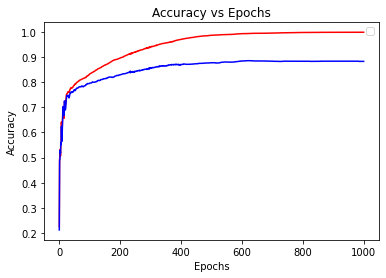

In [ ]:
NN.evaluate()

In [ ]:
#print("Input: " + str(X))
print(NN.predict(train_x_orig).shape)
loss = np.mean(np.square(train_y - NN.predict(train_x_orig)))
print("Actual Output: " + str(train_y))
print("Loss: " + str(loss))
print("\n")
pred_val = NN.predict(train_x_orig)
print("Predicted Output: " + str(pred_val))

(19425, 5)
Actual Output: [[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Loss: 0.006923106765027531


Predicted Output: [[4.22898644e-07 4.49158942e-04 9.99095124e-01 4.54215104e-04
  1.07899423e-06]
 [1.57957517e-06 1.75466577e-05 9.55399104e-08 9.99980778e-01
  1.44169212e-10]
 [9.71644488e-17 9.99999986e-01 1.71738891e-09 1.19433612e-08
  3.48254339e-17]
 ...
 [1.79242956e-07 9.05654948e-03 9.90943262e-01 9.26722292e-09
  6.19953225e-11]
 [6.05639874e-02 1.21119279e-04 1.50104978e-05 9.39299883e-01
  5.64926309e-12]
 [2.94095808e-04 1.17714610e-11 5.34688525e-15 1.24738110e-10
  9.99705904e-01]]


In [ ]:
inv_s = onehot_encoder.inverse_transform(pred_val)
inv_s = label_encoder.inverse_transform(inv_s.astype(int).ravel())
print(inv_s)

['neutral' 'sad' 'happy' ... 'neutral' 'sad' 'surprise']


In [ ]:
correct_pred = 0
for i in range(len(train_y_orig)):
  if train_y_orig[i] == inv_s[i]:
    correct_pred+=1
print("actual = ", len(train_y_orig))
print("Correct prediction = ", correct_pred)
print("accuracy = ", (correct_pred/len(train_y_orig)) * 100)

actual =  19425
Correct prediction =  19030
accuracy =  97.96653796653797


In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(train_y_orig, inv_s, labels=["happy", "sad", "angry", "surprise", "neutral"]))

[[5703   23   27   12   54]
 [  25 3870   20    5   23]
 [  17   26 3107   10   20]
 [  17    4    3 2537    7]
 [  51   21   20   10 3813]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler() 
test_x_orig = scaler.fit_transform(test_x_orig)
pred_test = NN.predict(test_x_orig)
inv_s = onehot_encoder.inverse_transform(pred_test)
inv_s = label_encoder.inverse_transform(inv_s.astype(int).ravel())
print(inv_s)

['angry' 'neutral' 'sad' ... 'happy' 'angry' 'happy']


In [ ]:
correct_pred = 0
for i in range(len(test_y_orig)):
  if test_y_orig[i] == inv_s[i]:
    correct_pred+=1
print("actual = ", len(test_y_orig))
print("Correct prediction = ", correct_pred)

actual =  4857
Correct prediction =  4717


In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(test_y_orig, inv_s, labels=["happy", "sad", "angry", "surprise", "neutral"]))

[[1321    7    7    4    6]
 [  15  966    6    1    7]
 [  15    5  782    1   10]
 [   5    1    1  627    3]
 [  19   14   12    1 1021]]


In [ ]:
## saving NN parameters
parameters = NN.returnModel()

In [ ]:
np.save('W1.npy', parameters["W1"]) 
np.save('W2.npy', parameters["W2"]) 
np.save('B1.npy', parameters["B1"]) 
np.save('B2.npy', parameters["B2"]) 

In [ ]:
## saving encoders
from sklearn.externals import joblib
joblib.dump(onehot_encoder, "onehot_encoder.joblib")
joblib.dump(label_encoder, "label_encoder.joblib")

['label_encoder.joblib']